<a href="https://colab.research.google.com/github/navyabagga/Lung-Cancer-Detection/blob/main/Lung_Cancer_(DenseNet169).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [3]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [4]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Final Year Project/Data Seperated/train',
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Final Year Project/Data Seperated/test',
    target_size = (224,224),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [5]:
base_model = tf.keras.applications.DenseNet169(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=True
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(4, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1664)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1664)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1704960   
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                        

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy','AUC','Precision','Recall'])

In [7]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    steps_per_epoch= 75
    )

Epoch 1/30
75/75 [==============================] - 220s 3s/step - loss: 1.4476 - accuracy: 0.4221 - auc: 0.6663 - precision: 0.3354 - recall: 0.6499 - val_loss: 1.2857 - val_accuracy: 0.4000 - val_auc: 0.6315 - val_precision: 0.2721 - val_recall: 0.8095
Epoch 2/30
75/75 [==============================] - 19s 251ms/step - loss: 1.1884 - accuracy: 0.5400 - auc: 0.7589 - precision: 0.3895 - recall: 0.7517 - val_loss: 1.0931 - val_accuracy: 0.5270 - val_auc: 0.7446 - val_precision: 0.3406 - val_recall: 0.8889
Epoch 3/30
75/75 [==============================] - 18s 243ms/step - loss: 1.0354 - accuracy: 0.5796 - auc: 0.8059 - precision: 0.4237 - recall: 0.8275 - val_loss: 0.8865 - val_accuracy: 0.6063 - val_auc: 0.8276 - val_precision: 0.3888 - val_recall: 0.9048
Epoch 4/30
75/75 [==============================] - 18s 240ms/step - loss: 0.8793 - accuracy: 0.6432 - auc: 0.8376 - precision: 0.4429 - recall: 0.8308 - val_loss: 0.8306 - val_accuracy: 0.6381 - val_auc: 0.8485 - val_precision: 0.

In [8]:
model.evaluate(train_generator)

77/77 [==============================] - 11s 139ms/step - loss: 0.0278 - accuracy: 0.9935 - auc: 0.9989 - precision: 0.7075 - recall: 0.9984


[0.027845939621329308,
 0.9934747219085693,
 0.998865008354187,
 0.7075144648551941,
 0.9983686804771423]

In [9]:
model.evaluate(validation_generator)

40/40 [==============================] - 6s 149ms/step - loss: 0.4351 - accuracy: 0.8667 - auc: 0.9581 - precision: 0.5545 - recall: 0.9683


[0.4351324141025543,
 0.8666666746139526,
 0.9580650329589844,
 0.5545454621315002,
 0.9682539701461792]

1/1 [==============================] - 4s 4s/step
[[0.49246782 0.11250579 0.45707056 0.9935579 ]]
THE UPLOADED IMAGE IS SUSPECTED AS: squamous cell carcinoma


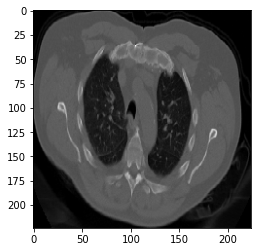

In [11]:
from keras.preprocessing import image
img = tf.keras.utils.load_img('/content/drive/MyDrive/Colab Notebooks/Final Year Project/Data Seperated/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000117 (4).png',target_size=(224,224))
imag = tf.keras.utils.img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
  op="Adenocarcinoma"
elif a==1:
  op="large cell carcinoma"
elif a==2:
  op="normal (void of cancer)"
else:
  op="squamous cell carcinoma"    
plt.imshow(img)
print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))  


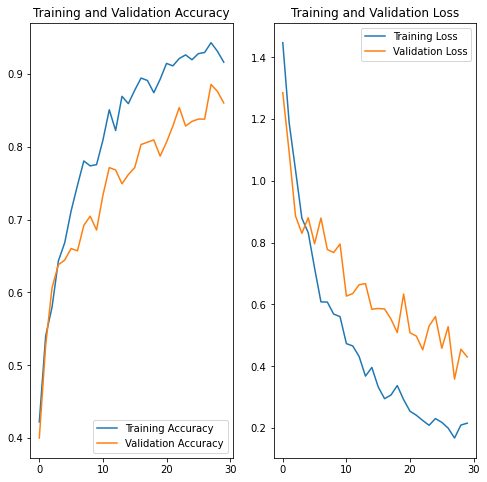

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()